AIN311 CLASS PROJECT

MELİKE NUR DULKADİR & SARE NAZ ERSOY

# Career Path Predictor

Importing necessary libraries

In [126]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree,svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
sns.set(style="white")
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv('https://raw.githubusercontent.com/sayalideo/Job-Role-Prediction-/master/Data/roo_data.csv')
df.head()

Acedamic percentage in Operating Systems  percentage in Algorithms  \
0                                        69                        63   
1                                        78                        62   
2                                        71                        86   
3                                        76                        87   
4                                        92                        62   

   Percentage in Programming Concepts  Percentage in Software Engineering  \
0                                  78                                  87   
1                                  73                                  60   
2                                  91                                  87   
3                                  60                                  84   
4                                  90                                  67   

   Percentage in Computer Networks  Percentage in Electronics Subjects  \
0                               94                                  94   
1                               71                                  70   
2                               61                                  81   
3                               89                                  73   
4                               71                                  89   

   Percentage in Computer Architecture  Percentage in Mathematics  \
0                                   87                         84   
1                                   73                         84   
2                                   72                         72   
3                                   62                         88   
4                                   73                         71   

   Percentage in Communication skills  Hours working per day  ...  \
0                                  61                      9  ...   
1                                  91                     12  ...   
2                                  94                     11  ...   
3                                  69                      7  ...   
4                                  73                      4  ...   

   Interested Type of Books  Salary Range Expected  In a Realtionship?  \
0              Prayer books                 salary                  no   
1                 Childrens                 salary                 yes   
2                    Travel                   Work                  no   
3                   Romance                   Work                 yes   
4                 Cookbooks                 salary                  no   

   Gentle or Tuff behaviour? Management or Technical Salary/work  \
0                   stubborn              Management      salary   
1                     gentle               Technical      salary   
2                   stubborn              Management        work   
3                     gentle              Management        work   
4                   stubborn              Management        work   

  hard/smart worker worked in teams ever? Introvert  \
0       hard worker                   yes        no   
1       hard worker                    no       yes   
2       hard worker                    no       yes   
3      smart worker                   yes       yes   
4       hard worker                   yes       yes   

              Suggested Job Role  
0         Database Administrator  
1                Project Manager  
2                Project Manager  
3         Security Administrator  
4  Business Intelligence Analyst  

[5 rows x 39 columns]

In [201]:
df.columns

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

Some utils functions for understand the data clearly

In [202]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Properties #####################")
    print(df.describe())

In [203]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                Class threshold for numeric but categorical variables
        car_th: int, optinal
                Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical view cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    #num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th anddataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    #cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    #num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
   # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [204]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [205]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [206]:
def check_outlier(dataframe, col_name, q1=.25, q3=.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [207]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [208]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [209]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [210]:
def plot_importance(model, features, save=False):

    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:len(features)])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

In [211]:
check_df(df)

##################### Shape #####################
(20000, 39)
##################### Types #####################
Acedamic percentage in Operating Systems     int64
percentage in Algorithms                     int64
Percentage in Programming Concepts           int64
Percentage in Software Engineering           int64
Percentage in Computer Networks              int64
Percentage in Electronics Subjects           int64
Percentage in Computer Architecture          int64
Percentage in Mathematics                    int64
Percentage in Communication skills           int64
Hours working per day                        int64
Logical quotient rating                      int64
hackathons                                   int64
coding skills rating                         int64
public speaking points                       int64
can work long time before system?           object
self-learning capability?                   object
Extra-courses did                           object
certifications       

In [212]:
df.columns = ['Academic_Percentage_In_Operating_Systems', 'Algorithms_Percentage',
              'Programming_Concepts_Percentage',
              'Software_Engineering_Percentage', 'Computer_Networks_Percentage',
              'Electronics_Subjects_Percentage',
              'Computer_Architecture_Percentage', 'Mathematics_Percentage',
              'Communication_Skills_Percentage', 'Hours_Working_Per_Day',
              'Logical_Quotient_Rating', 'Hackathons', 'Coding_Skills_Rating',
              'Public_Speaking_Points', 'Can_Work_Long_Time_Before_System',
              'Self-Learning_Capability', 'Extra_Courses_Did', 'Certifications',
              'Workshops', 'Talent_Tests_Taken', 'Olympiads',
              'Reading_And_Writing_Skills', 'Memory_Capability_Score',
              'Interested_Subjects', 'Interested_Career_Area', 'Job/Higher_Studies',
              'Type_Of_Company_Want_To_Settle_In',
              'Taken_Inputs_From_Seniors_Or_Elders', 'Interested_In_Games',
              'Interested_Type_Of_Books', 'Salary_Range_Expected',
              'Being_In_A_Relationship', 'Gentle_Or_Tuff_Behaviour',
              'Management_Or_Technical', 'Salary/Work', 'Worker_Type',
              'Worked_In_Teams_Ever', 'Introvert', 'Suggested_Job_Role']

In [213]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 20000
Variables: 39
cat_cols: 24
num_cols: 14
cat_but_car: 1


In [214]:
num_cols

['Academic_Percentage_In_Operating_Systems',
 'Algorithms_Percentage',
 'Programming_Concepts_Percentage',
 'Software_Engineering_Percentage',
 'Computer_Networks_Percentage',
 'Electronics_Subjects_Percentage',
 'Computer_Architecture_Percentage',
 'Mathematics_Percentage',
 'Communication_Skills_Percentage',
 'Hours_Working_Per_Day',
 'Logical_Quotient_Rating',
 'Hackathons',
 'Coding_Skills_Rating',
 'Public_Speaking_Points']

In [215]:
for col in num_cols:
    print(check_outlier(df,col))

False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [216]:
scaler = StandardScaler()
cols_to_scale = num_cols

#create and fit scaler
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])


<AxesSubplot: >

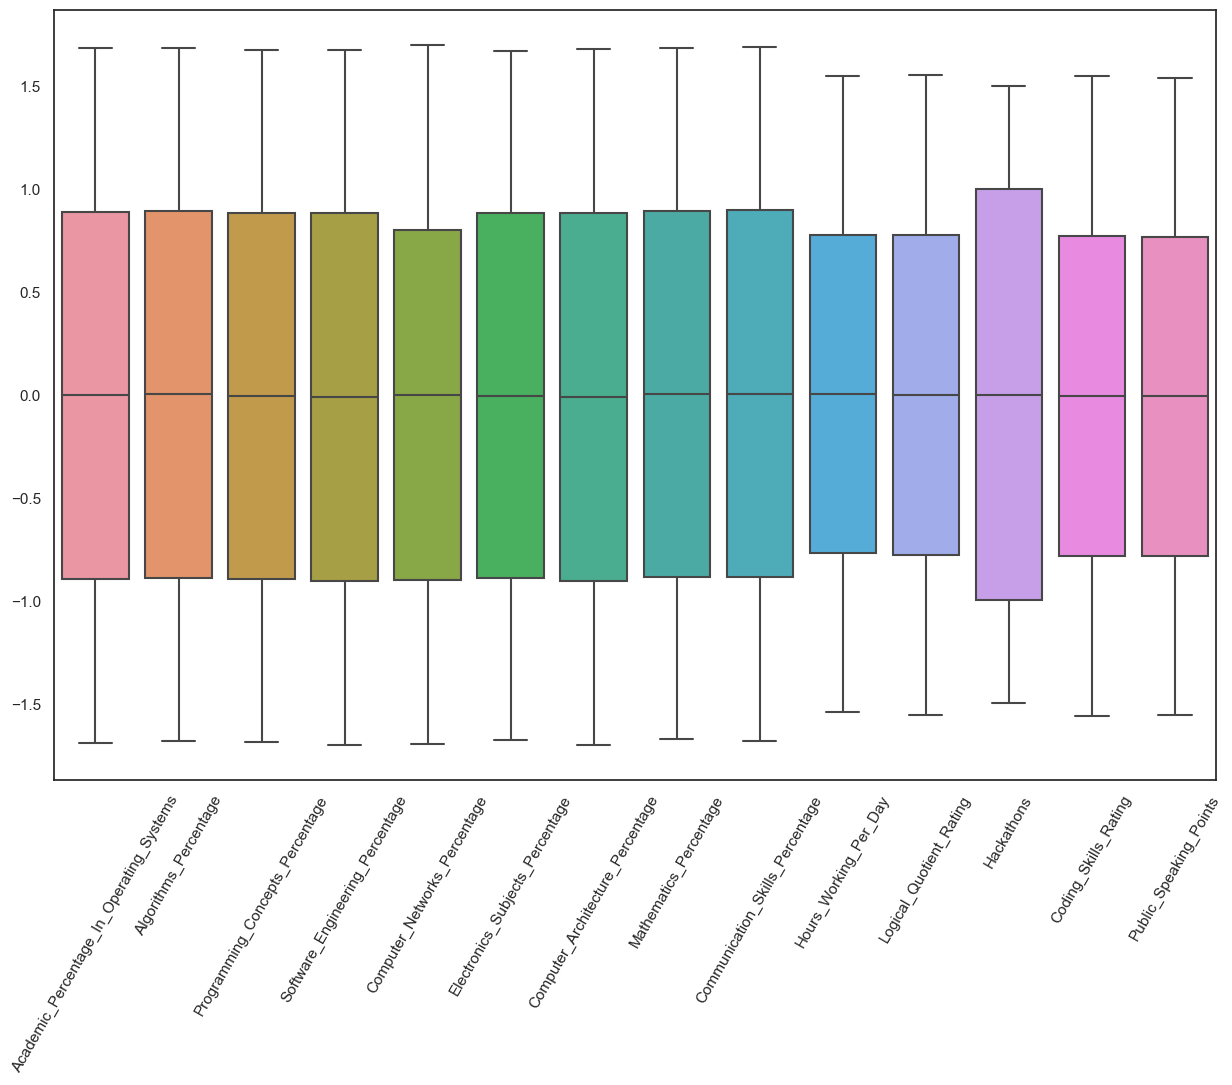

In [217]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=df[num_cols], ax=ax)

In [218]:
print("\n######## List of Categorical features ########\n")
for index,col in enumerate(cat_cols):
    print(index,col)


######## List of Categorical features ########

0 Can_Work_Long_Time_Before_System
1 Self-Learning_Capability
2 Extra_Courses_Did
3 Certifications
4 Workshops
5 Talent_Tests_Taken
6 Olympiads
7 Reading_And_Writing_Skills
8 Memory_Capability_Score
9 Interested_Subjects
10 Interested_Career_Area
11 Job/Higher_Studies
12 Type_Of_Company_Want_To_Settle_In
13 Taken_Inputs_From_Seniors_Or_Elders
14 Interested_In_Games
15 Salary_Range_Expected
16 Being_In_A_Relationship
17 Gentle_Or_Tuff_Behaviour
18 Management_Or_Technical
19 Salary/Work
20 Worker_Type
21 Worked_In_Teams_Ever
22 Introvert
23 Suggested_Job_Role


In [219]:
for i in cat_cols:
    print(df[i].value_counts(), end="\n\n")

yes    10020
no      9980
Name: Can_Work_Long_Time_Before_System, dtype: int64

yes    10102
no      9898
Name: Self-Learning_Capability, dtype: int64

no     10049
yes     9951
Name: Extra_Courses_Did, dtype: int64

r programming           2275
machine learning        2255
shell programming       2252
information security    2250
full stack              2239
hadoop                  2210
python                  2198
app development         2165
distro making           2156
Name: Certifications, dtype: int64

web technologies     2586
data science         2551
game development     2522
database security    2517
system designing     2516
hacking              2473
testing              2444
cloud computing      2391
Name: Workshops, dtype: int64

yes    10047
no      9953
Name: Talent_Tests_Taken, dtype: int64

yes    10079
no      9921
Name: Olympiads, dtype: int64

excellent    6696
poor         6683
medium       6621
Name: Reading_And_Writing_Skills, dtype: int64

poor         6677
exce

In [220]:
dummy_cols = ['Interested_Subjects',
              'Interested_Career_Area',
              'Type_Of_Company_Want_To_Settle_In',
              'Worker_Type','Certifications',
              'Workshops']
dummy_cols

['Interested_Subjects',
 'Interested_Career_Area',
 'Type_Of_Company_Want_To_Settle_In',
 'Worker_Type',
 'Certifications',
 'Workshops']

In [221]:
df.head()

Academic_Percentage_In_Operating_Systems  Algorithms_Percentage  \
0                                 -0.793450              -1.380807   
1                                  0.098925              -1.479803   
2                                 -0.595145               0.896086   
3                                 -0.099381               0.995082   
4                                  1.487064              -1.479803   

   Programming_Concepts_Percentage  Software_Engineering_Percentage  \
0                         0.096941                         0.981950   
1                        -0.396421                        -1.694608   
2                         1.379680                         0.981950   
3                        -1.679160                         0.684554   
4                         1.281008                        -1.000686   

   Computer_Networks_Percentage  Electronics_Subjects_Percentage  \
0                      1.700806                         1.670279   
1                     -0.594640                        -0.689921   
2                     -1.592660                         0.391837   
3                      1.201796                        -0.394896   
4                     -0.594640                         1.178570   

   Computer_Architecture_Percentage  Mathematics_Percentage  \
0                          0.986229                0.699022   
1                         -0.404204                0.699022   
2                         -0.503520               -0.484608   
3                         -1.496687                1.093566   
4                         -0.404204               -0.583244   

   Communication_Skills_Percentage  Hours_Working_Per_Day  ...  \
0                        -1.575875               0.390962  ...   
1                         1.393469               1.547595  ...   
2                         1.690403               1.162051  ...   
3                        -0.784050              -0.380128  ...   
4                        -0.388138              -1.536762  ...   

   Interested_Type_Of_Books  Salary_Range_Expected  Being_In_A_Relationship  \
0              Prayer books                 salary                       no   
1                 Childrens                 salary                      yes   
2                    Travel                   Work                       no   
3                   Romance                   Work                      yes   
4                 Cookbooks                 salary                       no   

   Gentle_Or_Tuff_Behaviour Management_Or_Technical Salary/Work   Worker_Type  \
0                  stubborn              Management      salary   hard worker   
1                    gentle               Technical      salary   hard worker   
2                  stubborn              Management        work   hard worker   
3                    gentle              Management        work  smart worker   
4                  stubborn              Management        work   hard worker   

  Worked_In_Teams_Ever Introvert             Suggested_Job_Role  
0                  yes        no         Database Administrator  
1                   no       yes                Project Manager  
2                   no       yes                Project Manager  
3                  yes       yes         Security Administrator  
4                  yes       yes  Business Intelligence Analyst  

[5 rows x 39 columns]

In [222]:
cat_cols.remove("Suggested_Job_Role")
label_encoder = LabelEncoder()
for cat_col in cat_cols:
    if cat_col not in dummy_cols:
        df[cat_col]= label_encoder.fit_transform(df[cat_col])

In [223]:
df2 = df[dummy_cols]

In [224]:
df2 = pd.get_dummies(df2,prefix="dum",drop_first=True)

In [225]:
df = df.join(df2)

In [226]:
df.drop(columns=dummy_cols, inplace=True)

In [227]:
df['Suggested_Job_Role'] = df.pop('Suggested_Job_Role')

In [228]:
df.head()

Academic_Percentage_In_Operating_Systems  Algorithms_Percentage  \
0                                 -0.793450              -1.380807   
1                                  0.098925              -1.479803   
2                                 -0.595145               0.896086   
3                                 -0.099381               0.995082   
4                                  1.487064              -1.479803   

   Programming_Concepts_Percentage  Software_Engineering_Percentage  \
0                         0.096941                         0.981950   
1                        -0.396421                        -1.694608   
2                         1.379680                         0.981950   
3                        -1.679160                         0.684554   
4                         1.281008                        -1.000686   

   Computer_Networks_Percentage  Electronics_Subjects_Percentage  \
0                      1.700806                         1.670279   
1                     -0.594640                        -0.689921   
2                     -1.592660                         0.391837   
3                      1.201796                        -0.394896   
4                     -0.594640                         1.178570   

   Computer_Architecture_Percentage  Mathematics_Percentage  \
0                          0.986229                0.699022   
1                         -0.404204                0.699022   
2                         -0.503520               -0.484608   
3                         -1.496687                1.093566   
4                         -0.404204               -0.583244   

   Communication_Skills_Percentage  Hours_Working_Per_Day  ...  \
0                        -1.575875               0.390962  ...   
1                         1.393469               1.547595  ...   
2                         1.690403               1.162051  ...   
3                        -0.784050              -0.380128  ...   
4                        -0.388138              -1.536762  ...   

   dum_r programming  dum_shell programming  dum_data science  \
0                  0                      1                 0   
1                  0                      0                 0   
2                  0                      0                 0   
3                  0                      0                 1   
4                  0                      0                 0   

   dum_database security  dum_game development  dum_hacking  \
0                      0                     0            0   
1                      1                     0            0   
2                      0                     0            0   
3                      0                     0            0   
4                      0                     0            0   

   dum_system designing  dum_testing  dum_web technologies  \
0                     0            0                     0   
1                     0            0                     0   
2                     0            0                     1   
3                     0            0                     0   
4                     0            0                     0   

              Suggested_Job_Role  
0         Database Administrator  
1                Project Manager  
2                Project Manager  
3         Security Administrator  
4  Business Intelligence Analyst  

[5 rows x 72 columns]

<AxesSubplot: >

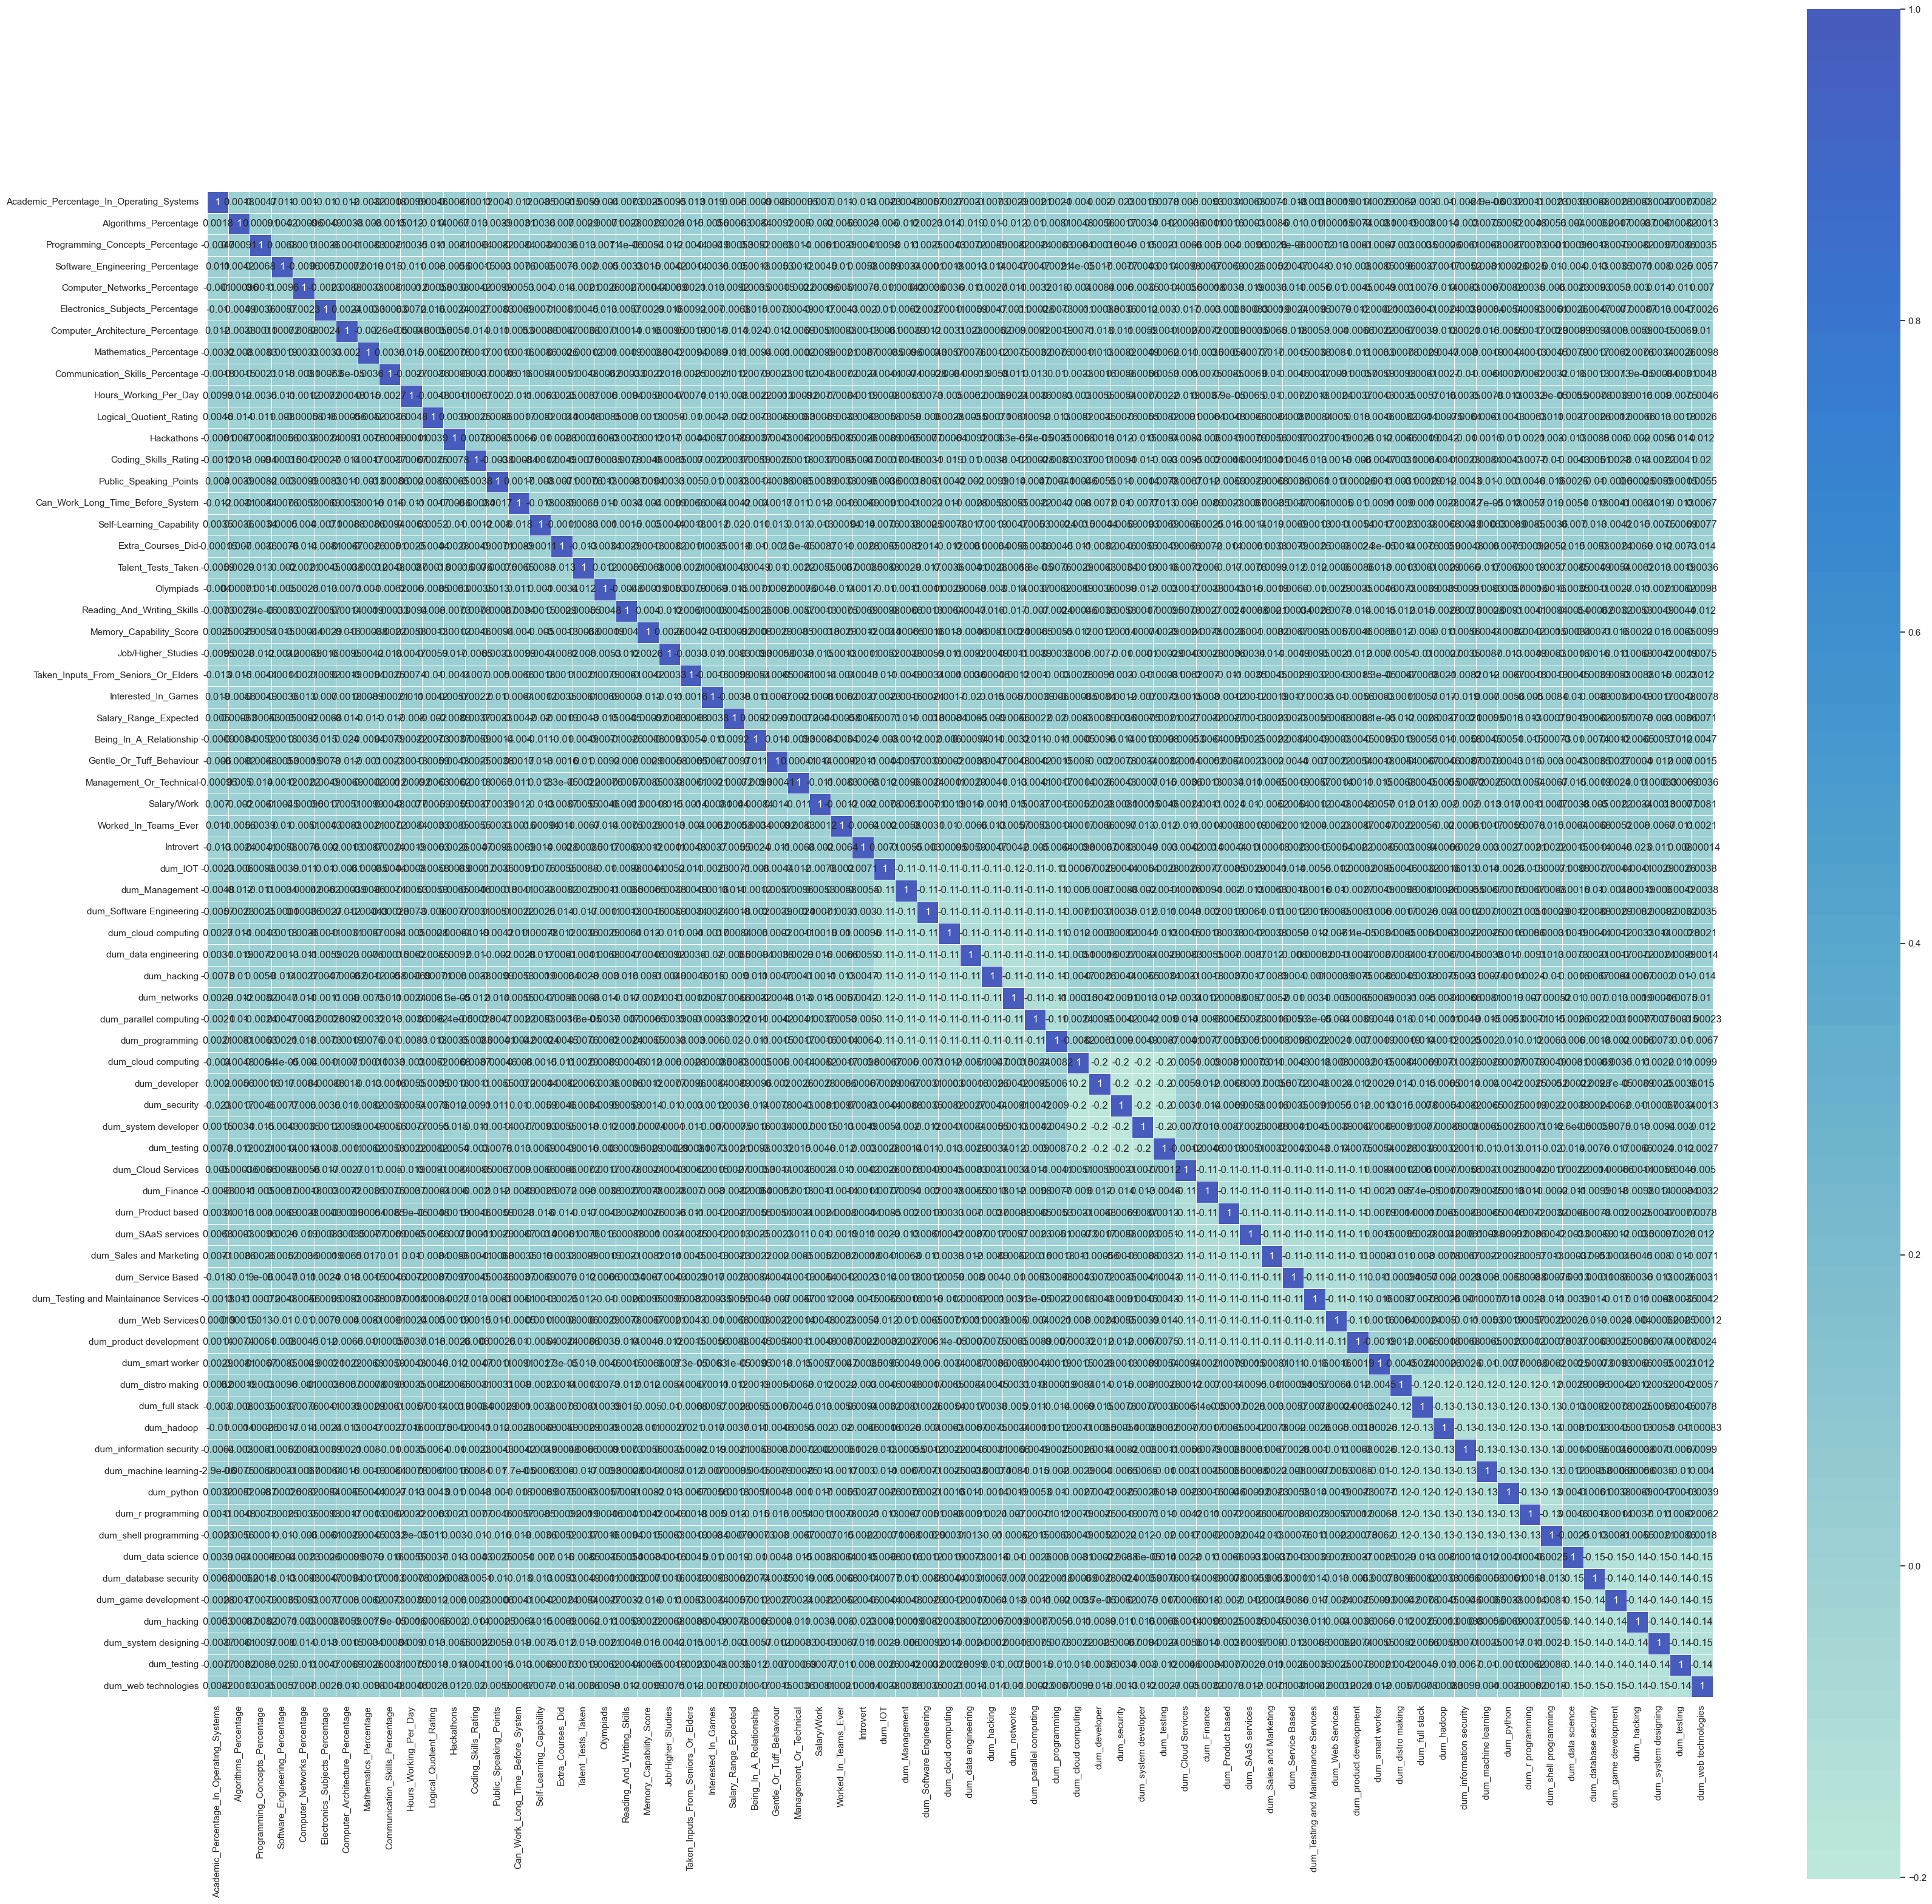

In [229]:
df3 = df.drop(columns = ["Suggested_Job_Role"])
df3 = df3.corr()
f,axes = plt.subplots(1,1,figsize = (40,40))
sns.heatmap(df3,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [230]:
pca = PCA()
pca.fit(df3)
PC_components = np.arange(pca.n_components_) + 1

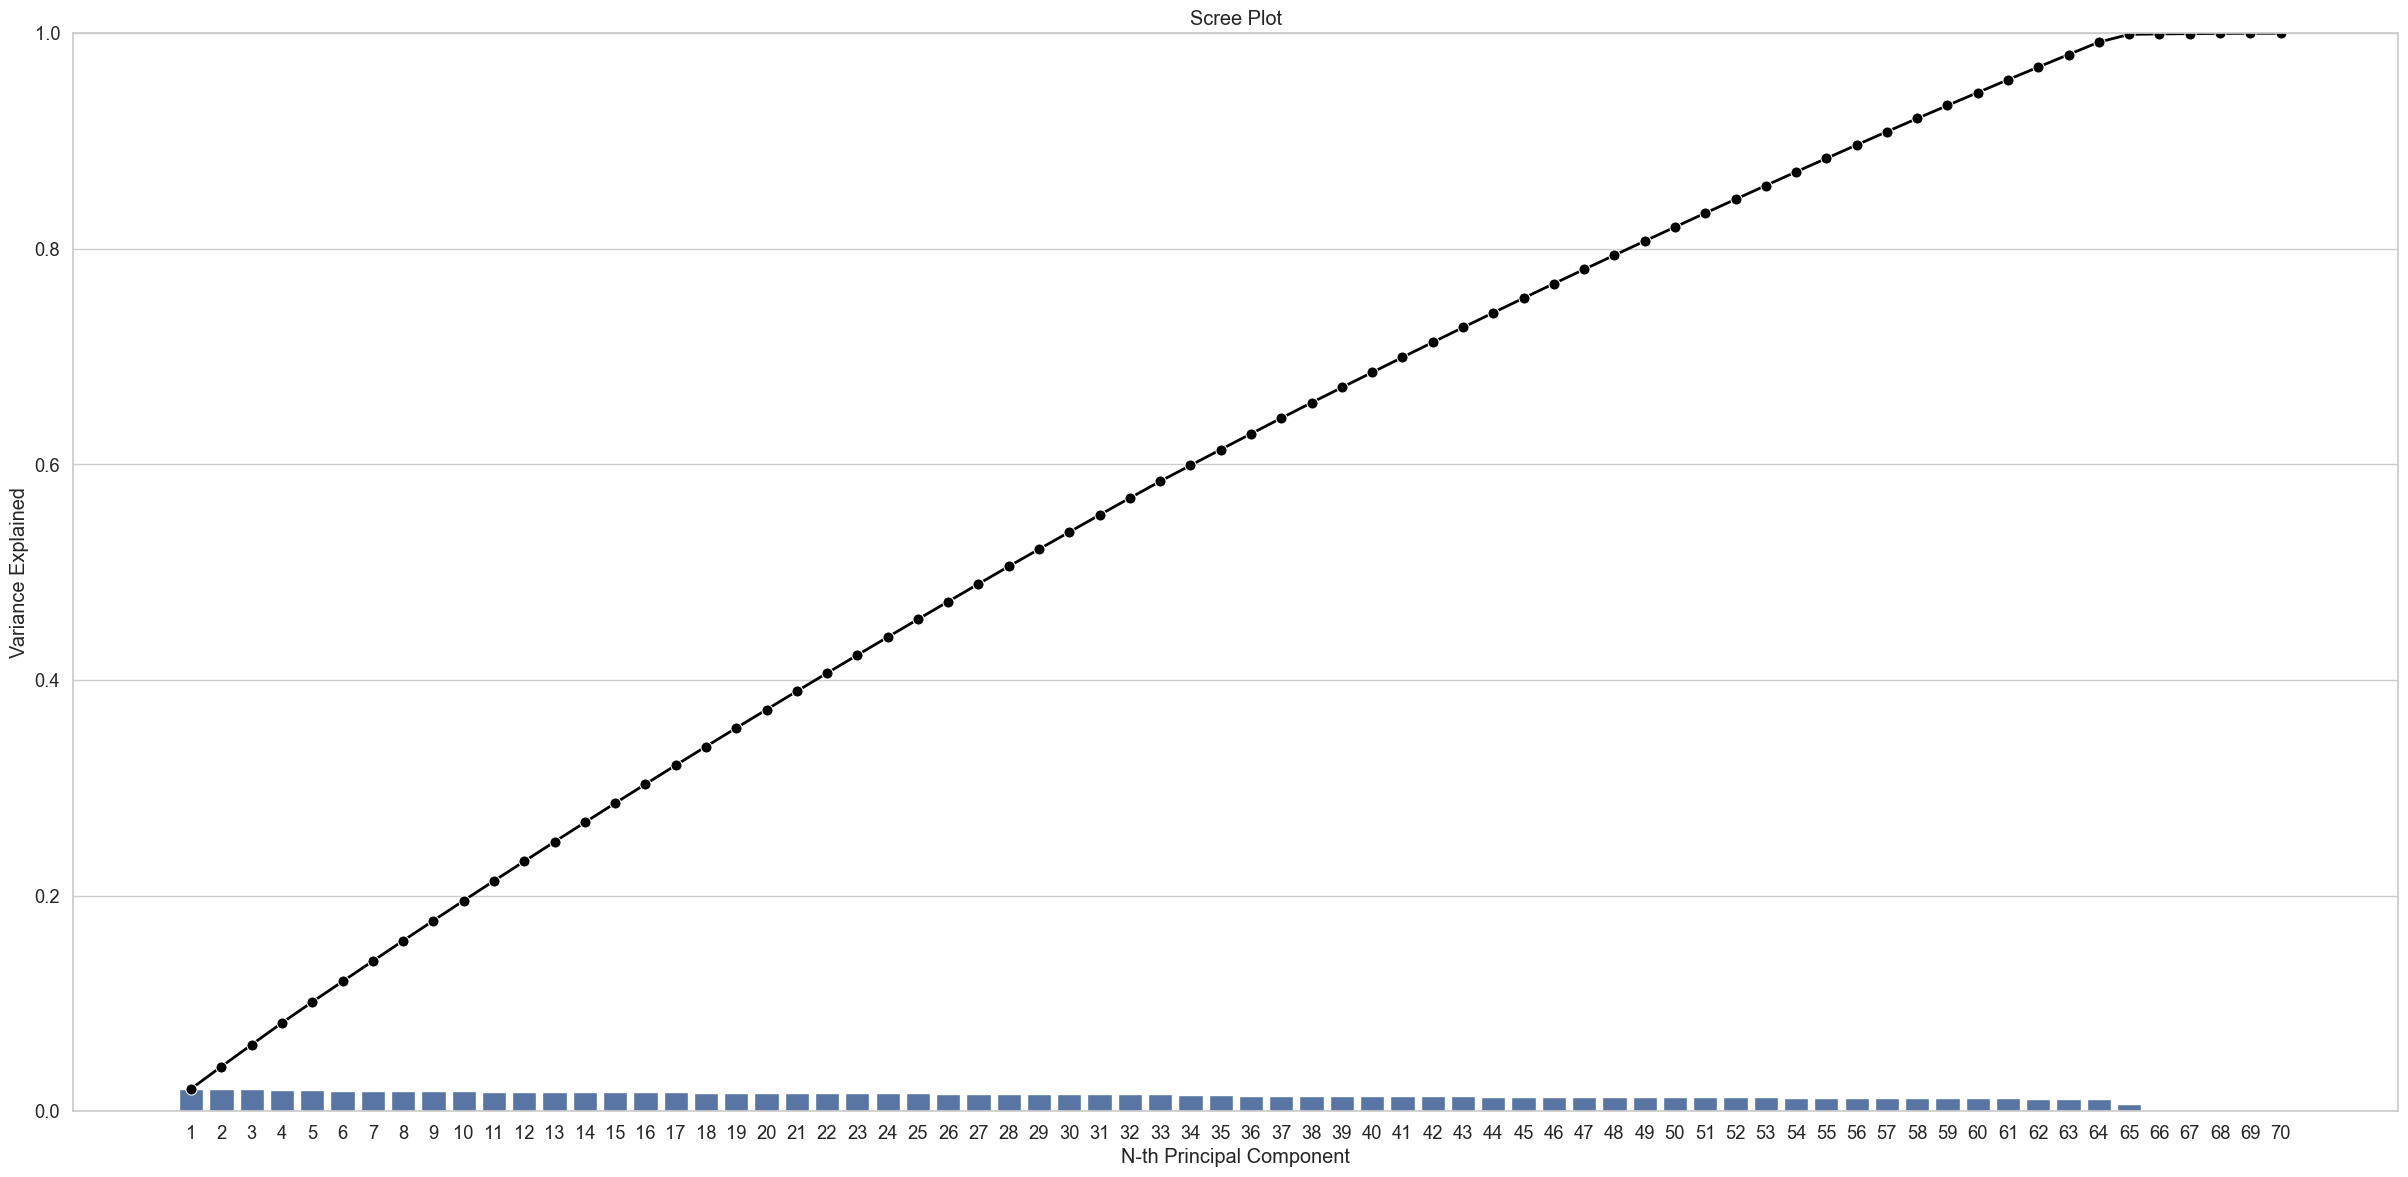

In [231]:
# Scree Plot
scree_plot = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(30, 14))
scree_plot = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
scree_plot = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()
#As you see after 18 feature relation, there is no change in data explainability.
#Which means we can use 18 feature to explain our data.

As you see, with specific 7 columns,we obtained nothing. So, we decided to find and drop them.

In [232]:
drop_list = high_correlated_cols(df)

In [233]:
drop_list

['dum_cloud computing',
 'dum_hacking',
 'dum_cloud computing',
 'dum_testing',
 'dum_hacking',
 'dum_testing']

In [234]:
df.drop(columns=drop_list, axis = 1, inplace=True)

We thought that the interested type of book is unnecessary and decided to drop that as well.

In [235]:
df.drop(columns=['Interested_Type_Of_Books'], axis=1,inplace=True)

In [236]:
df.corr()

Academic_Percentage_In_Operating_Systems  \
Academic_Percentage_In_Operating_Systems                                  1.000000   
Algorithms_Percentage                                                     0.001781   
Programming_Concepts_Percentage                                          -0.004693   
Software_Engineering_Percentage                                           0.010691   
Computer_Networks_Percentage                                             -0.001003   
...                                                                            ...   
dum_data science                                                          0.003940   
dum_database security                                                     0.006849   
dum_game development                                                     -0.002835   
dum_system designing                                                     -0.003674   
dum_web technologies                                                      0.008172   

                                          Algorithms_Percentage  \
Academic_Percentage_In_Operating_Systems               0.001781   
Algorithms_Percentage                                  1.000000   
Programming_Concepts_Percentage                        0.000914   
Software_Engineering_Percentage                        0.004178   
Computer_Networks_Percentage                          -0.000961   
...                                                         ...   
dum_data science                                       0.003964   
dum_database security                                 -0.000621   
dum_game development                                   0.001724   
dum_system designing                                  -0.006055   
dum_web technologies                                  -0.001255   

                                          Programming_Concepts_Percentage  \
Academic_Percentage_In_Operating_Systems                        -0.004693   
Algorithms_Percentage                                            0.000914   
Programming_Concepts_Percentage                                  1.000000   
Software_Engineering_Percentage                                  0.006810   
Computer_Networks_Percentage                                     0.001120   
...                                                                   ...   
dum_data science                                                -0.000958   
dum_database security                                            0.001812   
dum_game development                                            -0.007896   
dum_system designing                                            -0.009732   
dum_web technologies                                             0.003464   

                                          Software_Engineering_Percentage  \
Academic_Percentage_In_Operating_Systems                         0.010691   
Algorithms_Percentage                                            0.004178   
Programming_Concepts_Percentage                                  0.006810   
Software_Engineering_Percentage                                  1.000000   
Computer_Networks_Percentage                                    -0.009601   
...                                                                   ...   
dum_data science                                                -0.003953   
dum_database security                                           -0.013119   
dum_game development                                            -0.003544   
dum_system designing                                             0.007985   
dum_web technologies                                            -0.005693   

                                          Computer_Networks_Percentage  \
Academic_Percentage_In_Operating_Systems                     -0.001003   
Algorithms_Percentage                                        -0.000961   
Programming_Concepts_Percentage                               0.001120   
Software_Engineering_Percentage                           

<AxesSubplot: xlabel='Suggested_Job_Role', ylabel='count'>

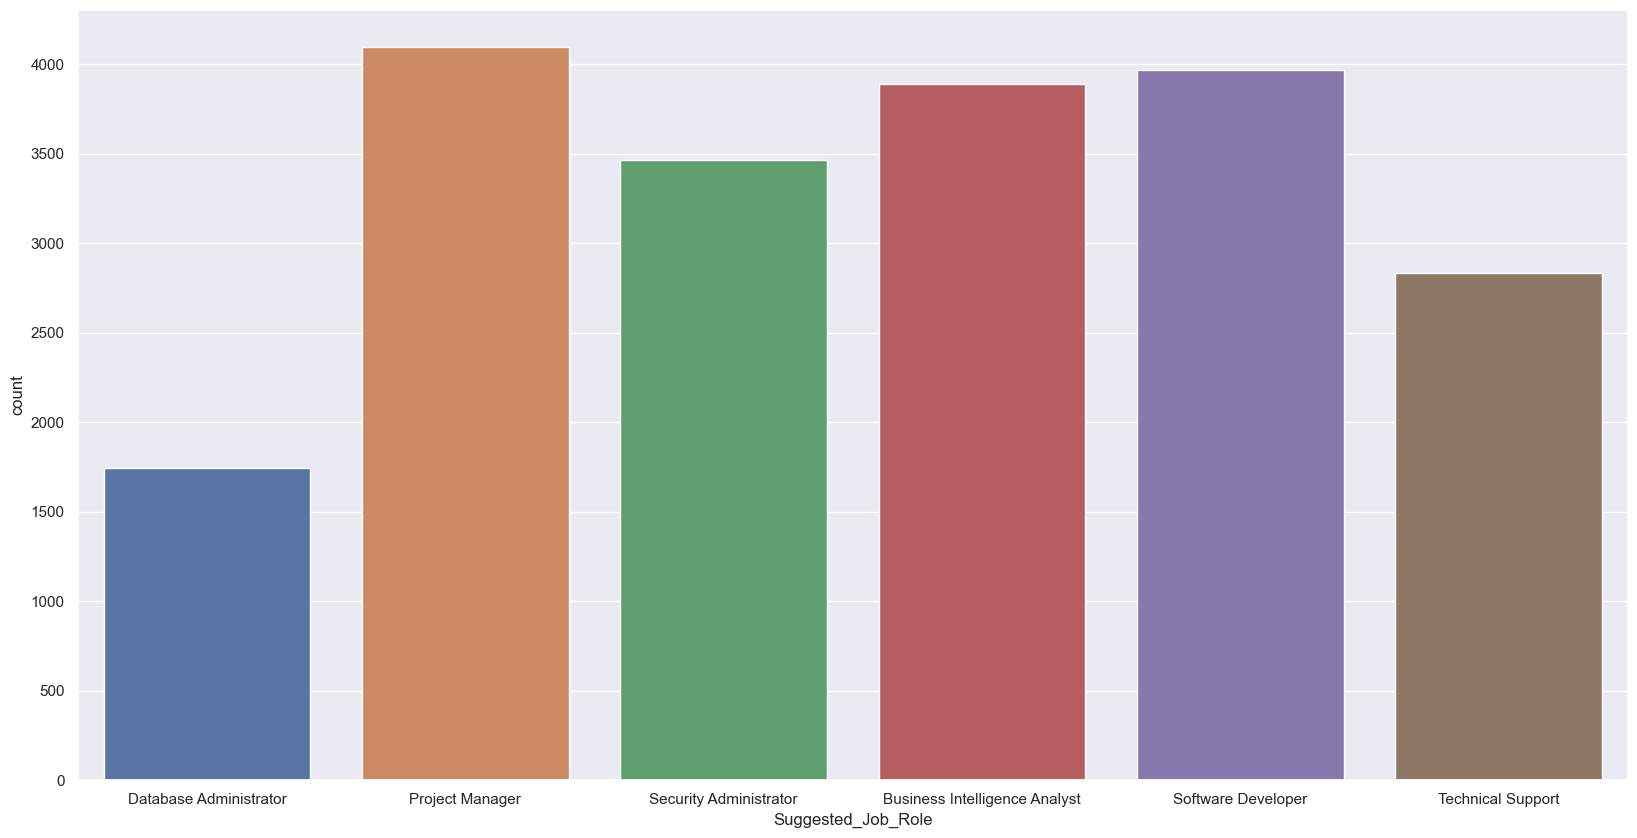

In [237]:
# Checking for data imbalanceness if any
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x = df["Suggested_Job_Role"])

Creating a decision tree model just for seeing the importance of features

In [238]:
X = df.drop(columns=["Suggested_Job_Role"],axis=1)
y = df["Suggested_Job_Role"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [239]:
decision_tree_model = tree.DecisionTreeClassifier(random_state = 0)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrix=\n",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrix=
 [[218  95 240 224 221 166]
 [100  46 105  98  93  86]
 [245 118 246 208 216 175]
 [206  86 210 178 202 172]
 [244 107 236 207 246 141]
 [169  70 172 159 171 124]]
  
accuracy= 17.633333333333333


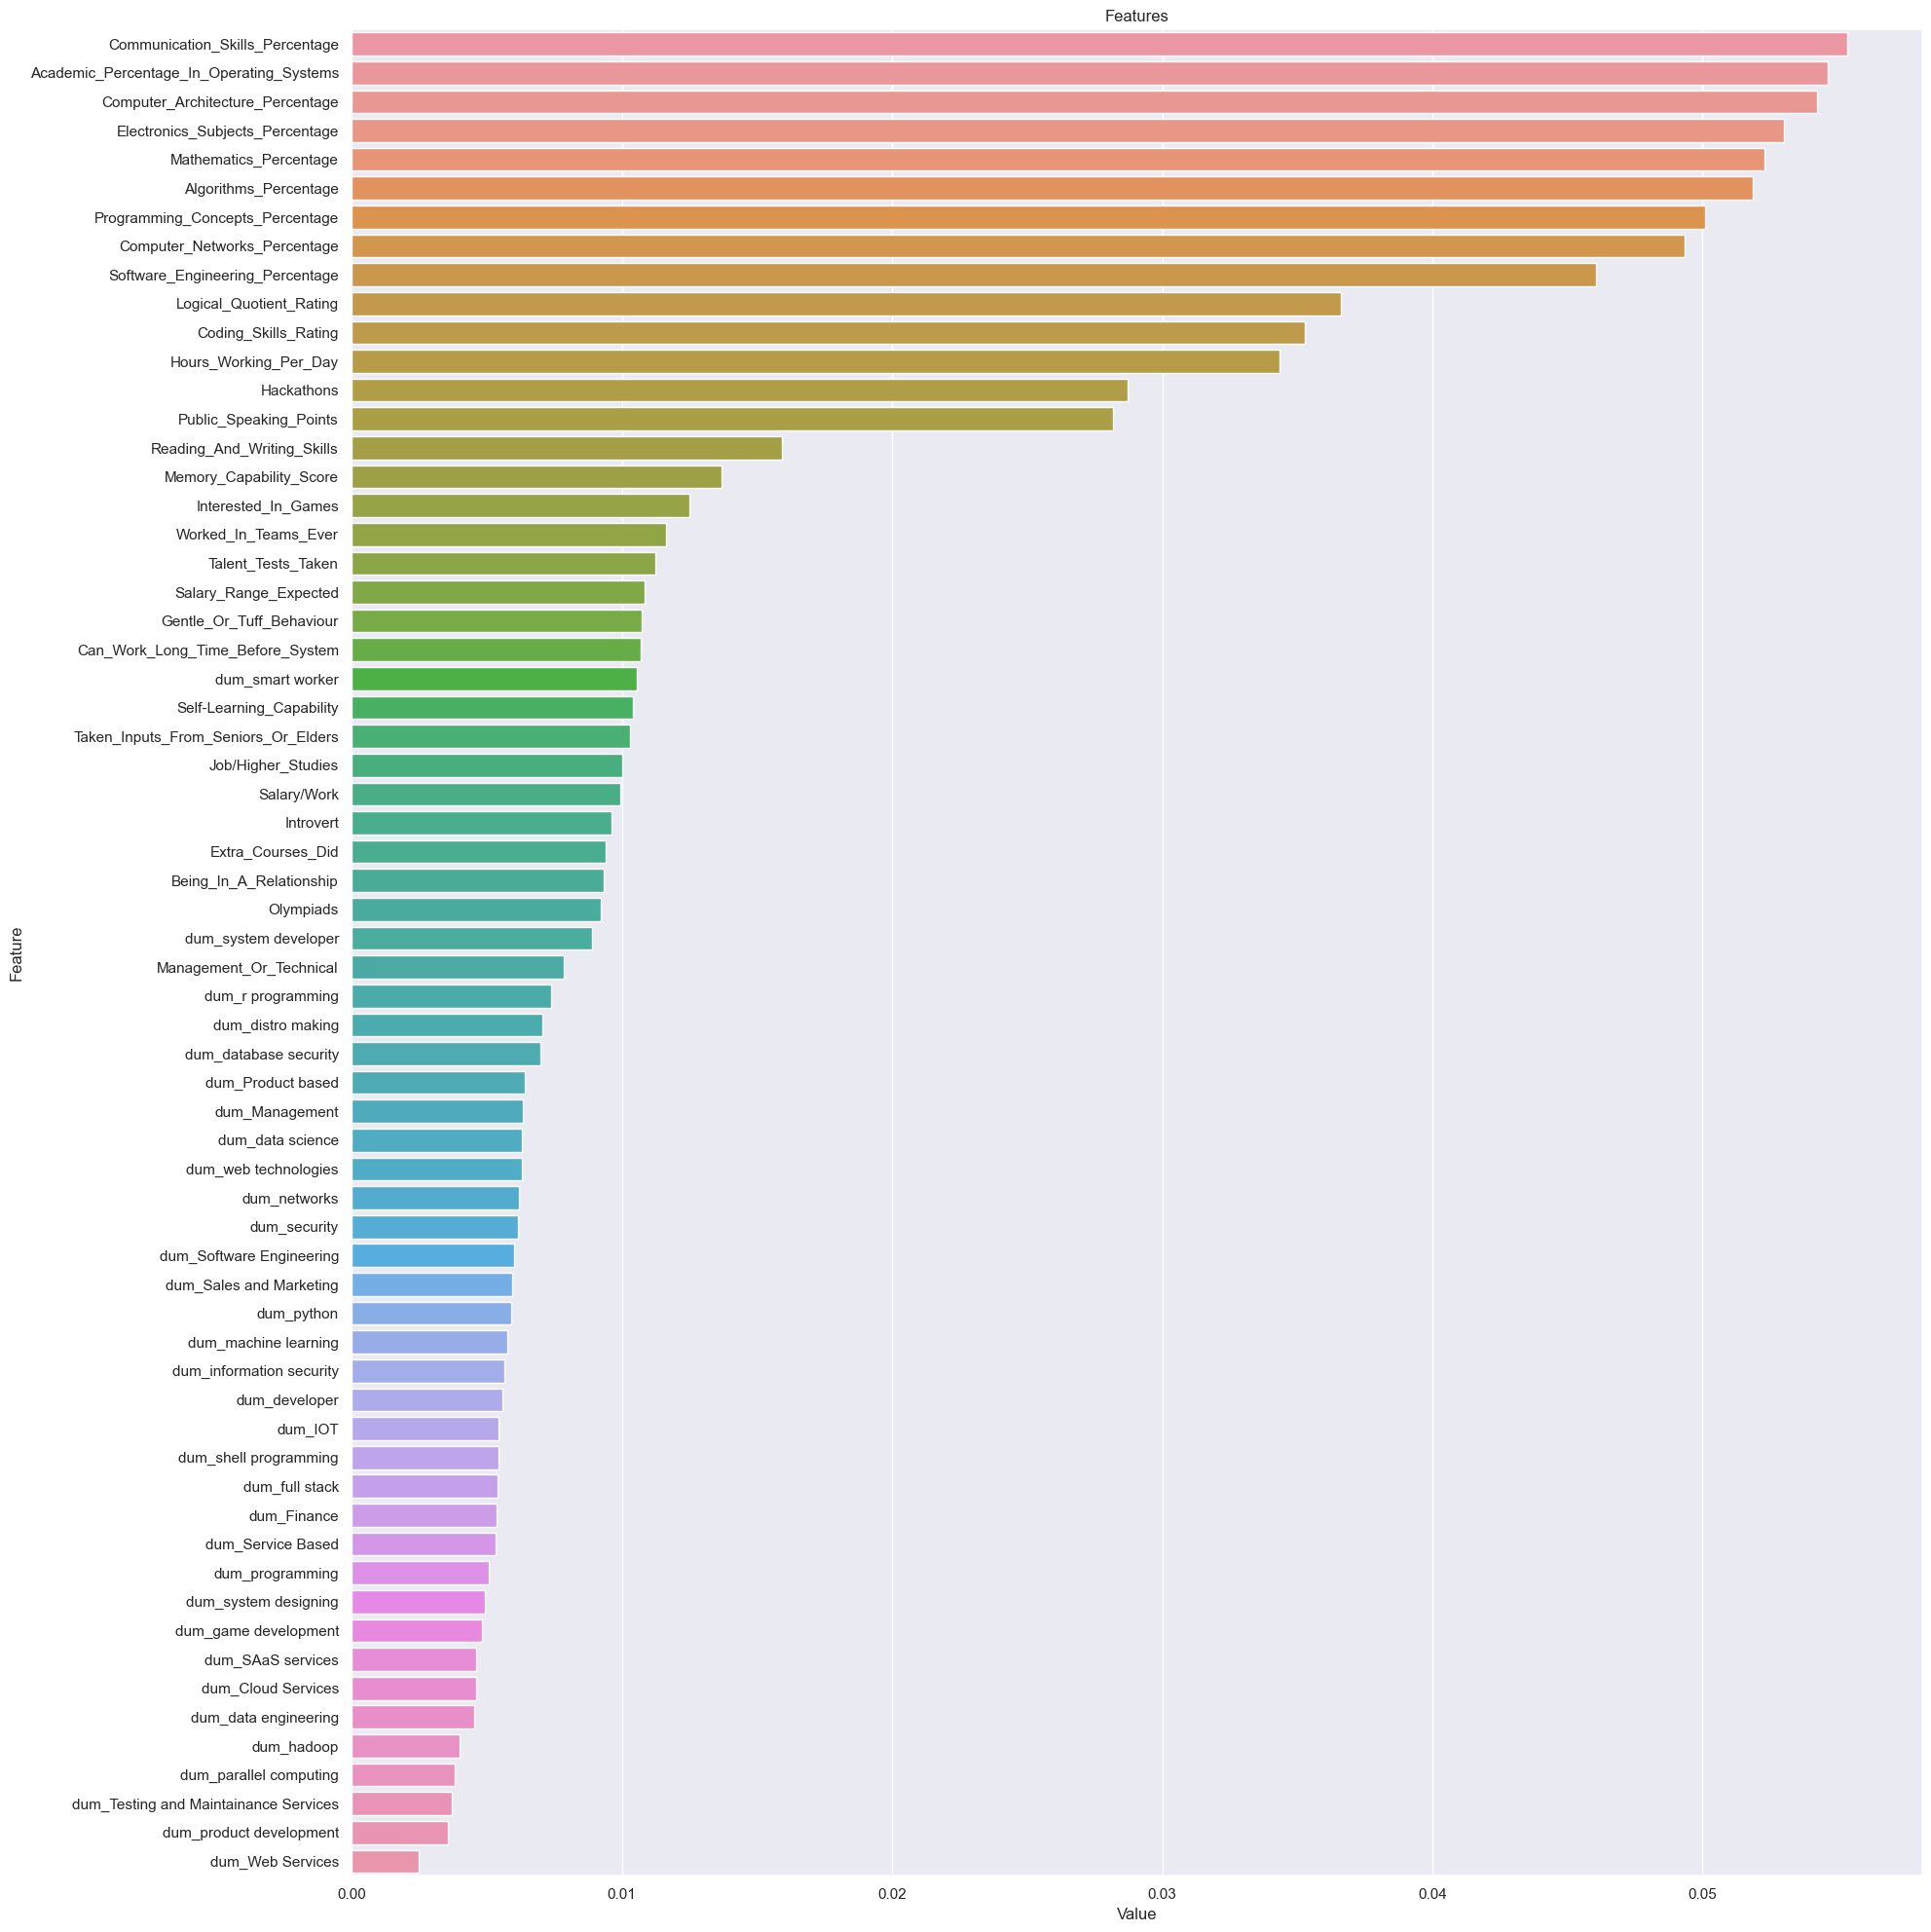

In [240]:
plot_importance(decision_tree_model,X)

#### Feature Engineering

In [241]:
#Introvert no = 0
def categorise_confidence(row,col_avg):
    if row['Public_Speaking_Points'] > col_avg and row['Introvert'] == 0:
        return 'self_confident'
    elif row['Public_Speaking_Points'] > col_avg and row['Introvert'] == 1:
        return 'only_introvert'
    elif row['Public_Speaking_Points'] < col_avg and row['Introvert'] == 0:
        return 'not_self_confident'
    elif row['Public_Speaking_Points'] < col_avg and row['Introvert'] == 1:
        return 'low_speaking_skill'

In [242]:
col_avg = df["Public_Speaking_Points"].mean()
df['Confidence'] = df.apply (lambda row: categorise_confidence(row,col_avg), axis=1)
df2 = pd.get_dummies(df["Confidence"], prefix="dum", drop_first=True)
df = df.join(df2)
df.drop(columns=["Confidence"], axis = 1, inplace=True)

In [243]:
def categorise_security(row):
    if row['dum_information security'] == 1 or  row['dum_database security'] == 1 or  row['dum_security'] == 1:
        return 1
    else:
        return 0

In [244]:
df['Security'] = df.apply (lambda row: categorise_security(row), axis=1)

In [245]:
def categorise_coding(row):
    if row['Coding_Skills_Rating'] < 3:
        return 'low_coding_skill'
    elif 3 <= row['Coding_Skills_Rating'] < 6:
        return 'medium_coding_skill'
    else:
        return 'high_coding'

In [246]:
df['Coding_Skills'] = df.apply (lambda row: categorise_coding(row), axis=1)
df2 = pd.get_dummies(df["Coding_Skills"], prefix="dum", drop_first=True)
df = df.join(df2)
df.drop(columns=["Coding_Skills"], axis = 1, inplace=True)

In [247]:
df["LogicalQuotient_Memory"] = df["Logical_Quotient_Rating"]*df["Memory_Capability_Score"]

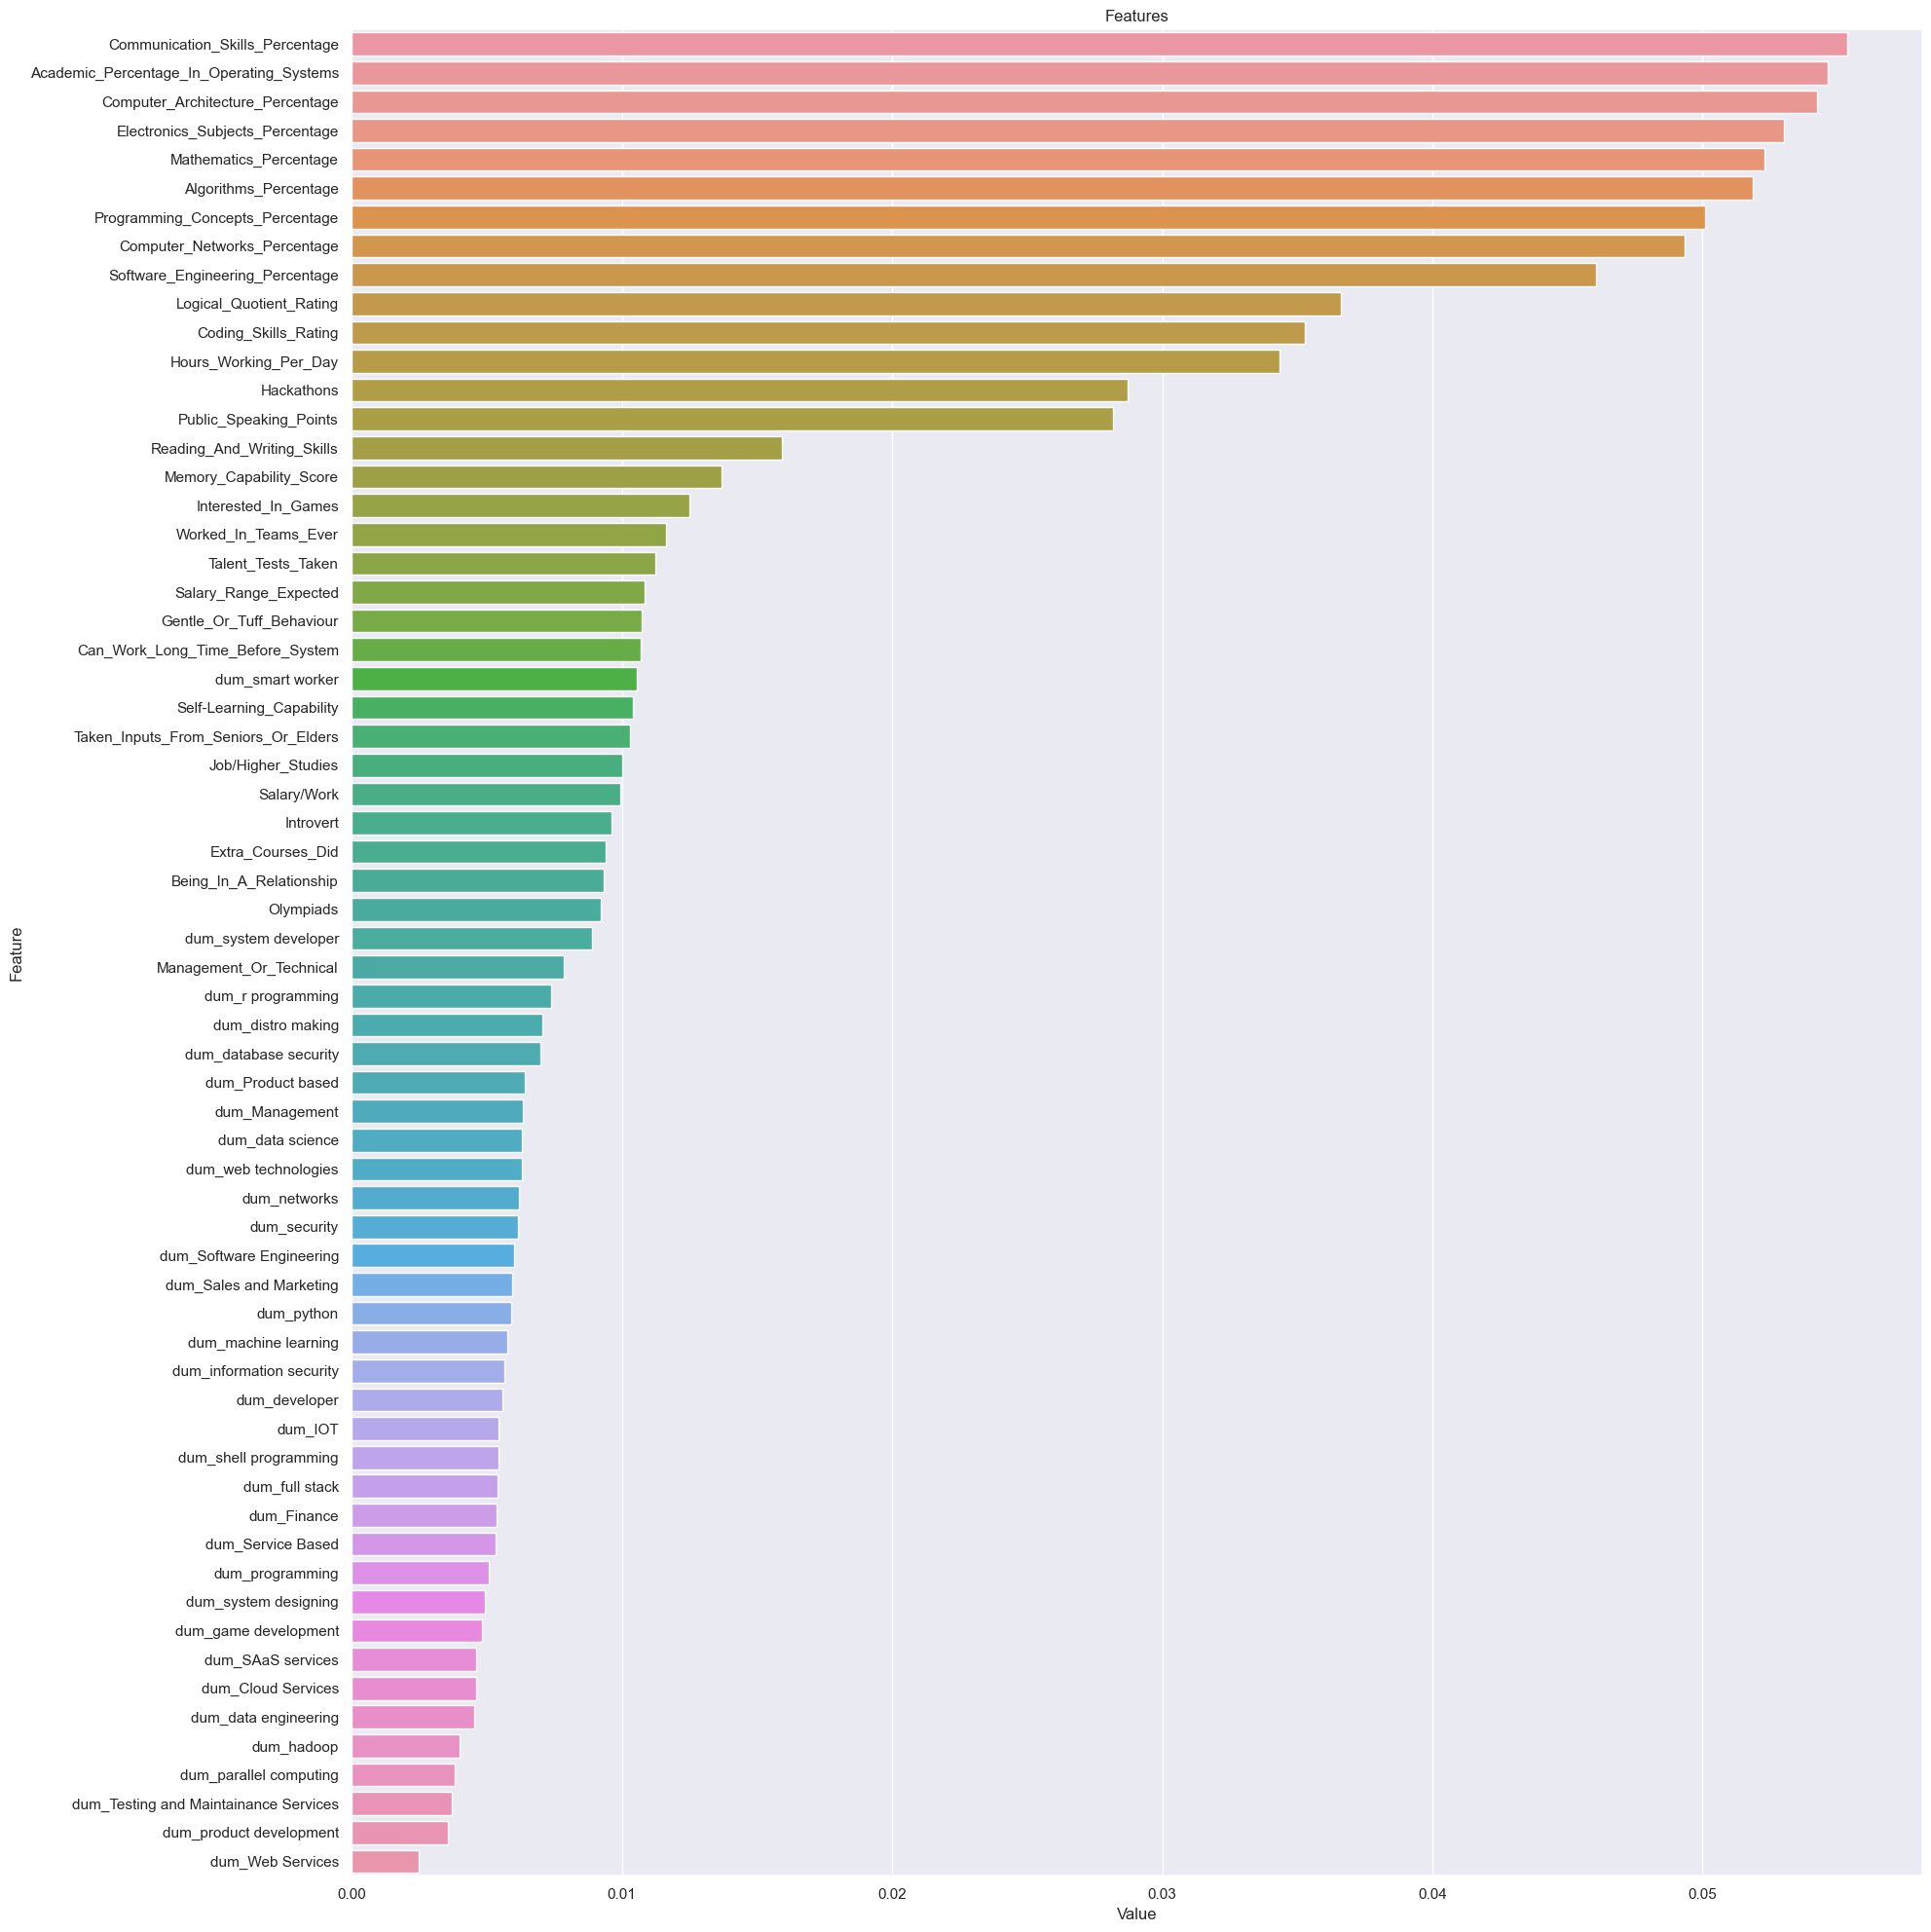

In [248]:
plot_importance(decision_tree_model,X)

## Creating Models

### Oversampling

In [478]:
df = shuffle(df)
X = df.drop(columns=["Suggested_Job_Role"], axis=1)
y = df.Suggested_Job_Role

In [479]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
pd.DataFrame(y).value_counts()

2    4099
4    3968
0    3889
3    3468
5    2832
1    1744
dtype: int64

In [480]:
from imblearn.over_sampling import SMOTE
from collections import Counter

strategy = {0:2778, 1:2400, 2:2874, 3:2416, 4:2808, 5:2400}
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=0, test_size=0.3)

In [482]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [483]:
counter = Counter(y_train)
for k, v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=2869 (16.667%)
Class=1, n=2869 (16.667%)
Class=2, n=2869 (16.667%)
Class=3, n=2869 (16.667%)
Class=4, n=2869 (16.667%)
Class=5, n=2869 (16.667%)


## *Decision Tree Model*

In [484]:
decision_tree_model = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)
cm = confusion_matrix(y_test,decision_tree_predictions)
accuracy = accuracy_score(y_test,decision_tree_predictions)
print("confusion matrix=\n",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrix=
 [[251 147 237 194 211 190]
 [139 498 132 151 130 180]
 [224 151 224 189 235 207]
 [220 164 204 256 193 193]
 [234 141 198 212 236 209]
 [196 179 210 200 173 271]]
  
accuracy= 23.526223065456023


## *Logistic Regression Model*

In [462]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
cm = confusion_matrix(y_test,lr_predictions)
accuracy = accuracy_score(y_test,lr_predictions)
print("confusion matrix=\n",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrix=
 [[204 170 179 204 218 192]
 [ 80  76  88  91  98  90]
 [203 172 179 206 266 204]
 [163 166 167 169 178 197]
 [207 189 193 200 216 185]
 [114 127 155 139 163 152]]
  
accuracy= 16.6


-- Grid Search CV for choosing best params to Logistic Regression model --

In [428]:
param_grid_lr = {
    'max_iter': [5,10,20, 50, 100, 200, 500, 1000],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced']
}

In [510]:
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=0), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
LogisticRegression(C=100, class_weight='balanced', max_iter=50, random_state=0)


In [515]:
log_model = LogisticRegression(C=100, class_weight='balanced', max_iter=50, random_state=0,solver='liblinear',penalty="l1")
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(y_pred)

[4 0 1 ... 1 3 3]


In [517]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.2446130912047703

## *Support Vector Machine Model*

In [273]:
svm_model = svm.SVC(kernel="rbf")
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test,svm_predictions)
svm_accuracy = accuracy_score(y_test,svm_predictions)
print("confusion matrics=\n",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*100)

confusion matrics=
 [[306  69 339 189 231  87]
 [147 649 148  86 107  66]
 [333  24 327 221 242  93]
 [283 138 306 208 239  89]
 [335  58 375 159 256  73]
 [224 223 244 132 172 201]]
  
accuracy= 26.385689117766635


## *Random Forest Model*

In [457]:
random_forest_model = RandomForestClassifier(random_state=42,n_estimators=300,max_features='log2',criterion='log_loss',min_samples_split = 3,max_depth=50)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
rfc_cm = confusion_matrix(y_test,random_forest_predictions)
rfc_accuracy = accuracy_score(y_test,random_forest_predictions)
print("confusion matrics=\n",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*100)

confusion matrics=
 [[   1    0    0    0 1166    0]
 [   0    0    0    0  523    0]
 [   0    0    0    0 1230    0]
 [   0    1    0    0 1038    1]
 [   0    0    0    1 1188    1]
 [   0    0    0    0  850    0]]
  
accuracy= 19.816666666666666


## *XGBoost Model*

In [275]:
eval_set = [(X_train, y_train), (X_test, y_test)]

xgboost_model=XGBClassifier(eval_metric=['merror','mlogloss'],learning_rate=0.02,objective='multi:softmax')
"""objective='multi:softmax',
                        num_class=6,
                        missing=0,
                        gamma=1, # default gamma value
                        learning_rate=0.002,
                        max_depth=3,
                        reg_lambda=1, # default L2 value
                        subsample=1, # default subsample value
                        colsample_bytree=1, # default colsample_bytree value
                        early_stopping_rounds=10,
                        eval_metric=['merror','mlogloss'],
                        seed=0"""
xgboost_model.fit(X_train,y_train, eval_set=eval_set,verbose = 0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['merror', 'mlogloss'], feature_types=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softmax', predictor='auto', ...)

In [276]:
xgboost_predictions = xgboost_model.predict(X_test)

accuracy = accuracy_score(y_test, xgboost_predictions)
print(accuracy)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.2526087545737905
Accuracy: 25.26%


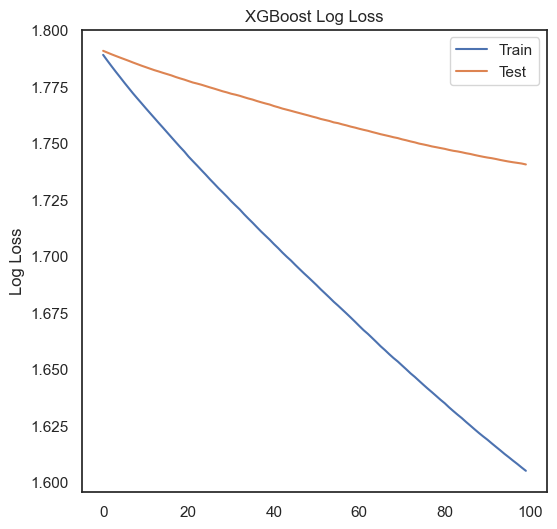

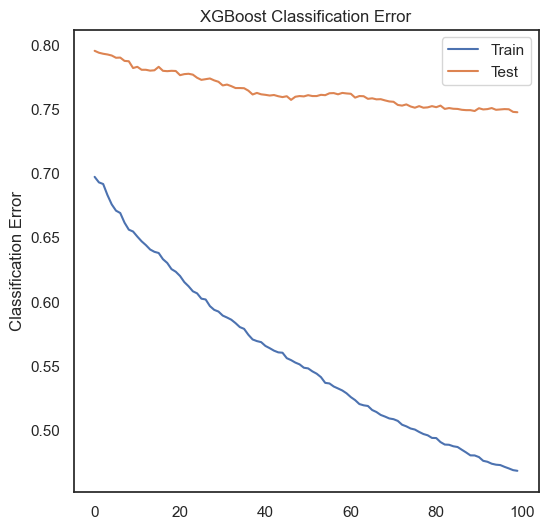

In [277]:
results = xgboost_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots(figsize=(6, 6))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()

pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots(figsize=(6, 6))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()

pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## *AdaBoost Model*


    Parameters
    -----------
    base_estimator: object
        The base model from which the boosted ensemble is built.
    n_estimators: integer, optional(default=50)
        The maximum number of estimators
    learning_rate: float, optional(default=1)
    algorithm: {'SAMME','SAMME.R'}, optional(default='SAMME.R')
        SAMME.R uses predicted probabilities to update wights, while SAMME uses class error rate
    random_state: int or None, optional(default=None)
    Attributes
    -------------
    estimators_: list of base estimators
    estimator_weights_: array of floats
        Weights for each base_estimator
    estimator_errors_: array of floats
        Classification error for each estimator in the boosted ensemble.
    Reference:
    1. [multi-adaboost](https://web.stanford.edu/~hastie/Papers/samme.pdf)
    2. [scikit-learn:weight_boosting](https://github.com/scikit-learn/
    scikit-learn/blob/51a765a/sklearn/ensemble/weight_boosting.py#L289)


In [284]:
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate= 0.02, random_state=0,algorithm="SAMME")
adaboost_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.02, n_estimators=100, random_state=0)

In [288]:
adaboost_predictions = adaboost_model.predict(X_test)
print(classification_report(y_test,adaboost_predictions))

              precision    recall  f1-score   support

           0       0.19      0.16      0.18      1221
           1       0.36      0.60      0.45      1203
           2       0.22      0.20      0.20      1240
           3       0.23      0.18      0.20      1263
           4       0.22      0.16      0.19      1256
           5       0.23      0.25      0.24      1196

    accuracy                           0.26      7379
   macro avg       0.24      0.26      0.24      7379
weighted avg       0.24      0.26      0.24      7379



## *Gaussian Naive Bayes Model*

In [287]:
gaussian_nb_model = GaussianNB().fit(X_train, y_train)

# accuracy on X_test
accuracy = gaussian_nb_model.score(X_test, y_test)
accuracy

0.2387857433256539

## *Gradient Boosting Model*

In [289]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_model = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_model.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_model.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.249
Accuracy score (validation): 0.219
Learning rate:  0.075
Accuracy score (training): 0.251
Accuracy score (validation): 0.221
Learning rate:  0.1
Accuracy score (training): 0.253
Accuracy score (validation): 0.219
Learning rate:  0.25
Accuracy score (training): 0.257
Accuracy score (validation): 0.223
Learning rate:  0.5
Accuracy score (training): 0.266
Accuracy score (validation): 0.226
Learning rate:  0.75
Accuracy score (training): 0.265
Accuracy score (validation): 0.237
Learning rate:  1
Accuracy score (training): 0.269
Accuracy score (validation): 0.238


In [293]:
gradient_boosting_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=10, max_depth=10, random_state=0)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, gradient_boosting_predictions))

print("Classification Report")
print(classification_report(y_test, gradient_boosting_predictions))

accuracy = gradient_boosting_model.score(X_test, y_test)
print(accuracy)

Confusion Matrix:
[[243 169 251 166 223 169]
 [ 90 699  98  86  99 131]
 [249 112 296 186 241 156]
 [248 203 236 223 190 163]
 [239 159 285 188 211 174]
 [171 263 169 119 161 313]]
Classification Report
              precision    recall  f1-score   support

           0       0.20      0.20      0.20      1221
           1       0.44      0.58      0.50      1203
           2       0.22      0.24      0.23      1240
           3       0.23      0.18      0.20      1263
           4       0.19      0.17      0.18      1256
           5       0.28      0.26      0.27      1196

    accuracy                           0.27      7379
   macro avg       0.26      0.27      0.26      7379
weighted avg       0.26      0.27      0.26      7379

0.26900664046618783


## *K-Neighbors Classifier Model*

In [382]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15,2):
    knn_classifier = KNeighborsClassifier(n_neighbors = i,weights ="distance")
    knn_classifier.fit(X_train, y_train)
    knn_classifier_predictions = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test,knn_classifier_predictions)
    print("K: ",i,"Accuracy: ",accuracy)

K:  1 Accuracy:  0.4329854993901613
K:  3 Accuracy:  0.39978316845100964
K:  5 Accuracy:  0.36278628540452634
K:  7 Accuracy:  0.3397479333242987
K:  9 Accuracy:  0.3209106925057596
K:  11 Accuracy:  0.307087681257623
K:  13 Accuracy:  0.29570402493562814


## *Adaboost Model with Voting Classifier*

In [296]:
votingClf = VotingClassifier([('clf1', SVC(probability=True)), ('clf2', DecisionTreeClassifier())], voting='soft')
adaBoostClassifier = AdaBoostClassifier(base_estimator=votingClf)
adaBoostClassifier.fit(X_train, y_train)
y_pred = adaBoostClassifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.2268600081311831


# Neural Network

In [297]:
df = shuffle(df)

X = np.asarray(X).astype('float32')
Y = np.array(y)


In [298]:
Y = to_categorical(Y)
Y = np.asarray(Y).astype('float32')

In [291]:
df.columns

Index(['Academic_Percentage_In_Operating_Systems', 'Algorithms_Percentage',
       'Programming_Concepts_Percentage', 'Software_Engineering_Percentage',
       'Computer_Networks_Percentage', 'Electronics_Subjects_Percentage',
       'Computer_Architecture_Percentage', 'Mathematics_Percentage',
       'Communication_Skills_Percentage', 'Hours_Working_Per_Day',
       'Logical_Quotient_Rating', 'Hackathons', 'Coding_Skills_Rating',
       'Public_Speaking_Points', 'Can_Work_Long_Time_Before_System',
       'Self-Learning_Capability', 'Extra_Courses_Did', 'Talent_Tests_Taken',
       'Olympiads', 'Reading_And_Writing_Skills', 'Memory_Capability_Score',
       'Job/Higher_Studies', 'Taken_Inputs_From_Seniors_Or_Elders',
       'Interested_In_Games', 'Salary_Range_Expected',
       'Being_In_A_Relationship', 'Gentle_Or_Tuff_Behaviour',
       'Management_Or_Technical', 'Salary/Work', 'Worked_In_Teams_Ever',
       'Introvert', 'Suggested_Job_Role', 'dum_IOT', 'dum_Management',
       'dum_

In [292]:
samples = df[['Academic_Percentage_In_Operating_Systems', 'Algorithms_Percentage',
               'Programming_Concepts_Percentage', 'Software_Engineering_Percentage',
               'Computer_Networks_Percentage', 'Electronics_Subjects_Percentage',
               'Computer_Architecture_Percentage', 'Mathematics_Percentage',
               'Communication_Skills_Percentage', 'Hours_Working_Per_Day',
               'Logical_Quotient_Rating', 'Hackathons', 'Coding_Skills_Rating',
               'Public_Speaking_Points',
               'Self-Learning_Capability', 'Extra_Courses_Did', 'Talent_Tests_Taken', 'Reading_And_Writing_Skills', 'Memory_Capability_Score',
               'Job/Higher_Studies', 'Taken_Inputs_From_Seniors_Or_Elders',
               'Interested_In_Games', 'Salary_Range_Expected',
               'Being_In_A_Relationship', 'Gentle_Or_Tuff_Behaviour',
               'Management_Or_Technical', 'Worked_In_Teams_Ever']]

In [299]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 0)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((17215, 69), (17215, 6), (7379, 69), (7379, 6))

In [342]:
from keras.applications.densenet import layers
from keras.optimizers import Adam
from sklearn.utils import class_weight

df = shuffle(df)
model = Sequential()
model.add(Dense(20, input_dim=69))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(16))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(6))
model.add(layers.Activation('softmax'))

adam = Adam(lr=0.001, epsilon=1e-8, decay=1e-4, amsgrad=False)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(train_x, train_y, epochs = 30, batch_size = 32, validation_data=(test_x, test_y))
scores = model.evaluate(test_x, test_y)

for i, m in enumerate(model.metrics_names):
    print(m,scores[i])

Epoch 1/30
538/538 [==============================] - 4s 6ms/step - loss: 1.8149 - accuracy: 0.1727 - val_loss: 1.7902 - val_accuracy: 0.1821
Epoch 2/30
538/538 [==============================] - 3s 5ms/step - loss: 1.7882 - accuracy: 0.1877 - val_loss: 1.7833 - val_accuracy: 0.1937
Epoch 3/30
538/538 [==============================] - 3s 5ms/step - loss: 1.7773 - accuracy: 0.2042 - val_loss: 1.7633 - val_accuracy: 0.2149
Epoch 4/30
538/538 [==============================] - 3s 5ms/step - loss: 1.7573 - accuracy: 0.2263 - val_loss: 1.7336 - val_accuracy: 0.2424
Epoch 5/30
538/538 [==============================] - 3s 5ms/step - loss: 1.7328 - accuracy: 0.2357 - val_loss: 1.7112 - val_accuracy: 0.2422
Epoch 6/30
538/538 [==============================] - 3s 5ms/step - loss: 1.7168 - accuracy: 0.2464 - val_loss: 1.7002 - val_accuracy: 0.2492
Epoch 7/30
538/538 [==============================] - 3s 5ms/step - loss: 1.7074 - accuracy: 0.2507 - val_loss: 1.6946 - val_accuracy: 0.2471
Epoch 

In [343]:
y_pred = model.predict(test_x)

231/231 [==============================] - 0s 1ms/step


In [344]:
test_size = 7379
pred_ = np.argmax(y_pred,axis=1)

pred_ = label_encoder.inverse_transform(pred_)

# true_y = np.argmax(y_test,axis=1)
# true_y = label_encoder.inverse_transform(true_y)
true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test[:test_size]), axis = 1))

count = 0
for i,j in zip(pred_, true_y):
    #print("Predicted: {}, True: {}".format(i, j))
    if i==j:
        print(j)
        count +=1
print(count)

Technical Support
Business Intelligence Analyst
Database Administrator
Technical Support
Project Manager
Software Developer
Technical Support
Project Manager
Database Administrator
Business Intelligence Analyst
Business Intelligence Analyst
Database Administrator
Project Manager
Business Intelligence Analyst
Project Manager
Software Developer
Project Manager
Project Manager
Software Developer
Project Manager
Project Manager
Project Manager
Technical Support
Software Developer
Business Intelligence Analyst
Project Manager
Project Manager
Business Intelligence Analyst
Technical Support
Software Developer
Project Manager
Database Administrator
Business Intelligence Analyst
Business Intelligence Analyst
Business Intelligence Analyst
Project Manager
Software Developer
Business Intelligence Analyst
Project Manager
Software Developer
Business Intelligence Analyst
Software Developer
Project Manager
Database Administrator
Software Developer
Project Manager
Business Intelligence Analyst
Software

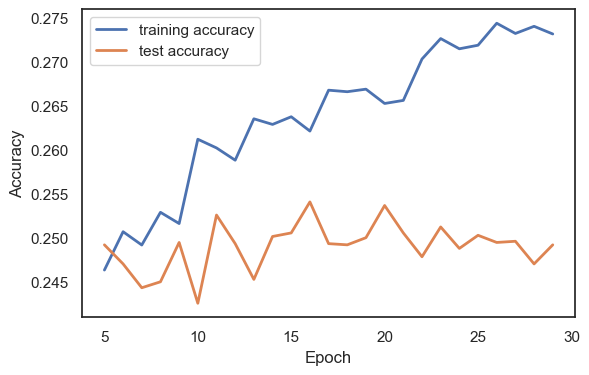

In [345]:
logs = pd.DataFrame(history.history)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training accuracy')
plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='test accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [346]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(120,80,40),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(120, 80, 40), max_iter=300)

In [347]:
y_pred = mlp_clf.predict(test_x)

print('Accuracy: {:.2f}'.format(accuracy_score(test_y, y_pred)))

Accuracy: 0.19


Although we tried many times with different structures, we encountered an overfit situation. That's why we started trying different solutions.

### Transfer Learning

We tried but we cannot find an appropriate model for our dataset

In [305]:
df = shuffle(df)
X = df.drop(['Suggested_Job_Role'], axis=1)
X = np.asarray(X).astype('float32')
Y = np.array(df['Suggested_Job_Role'])

l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)

In [306]:
classes = {0:"Project Manager",
           1:"Security Administrator",
           2:"Software Developer",
           3:"Business Intelligence Analyst",
           4:"Technical Support",
           5:"Database Administrator"}

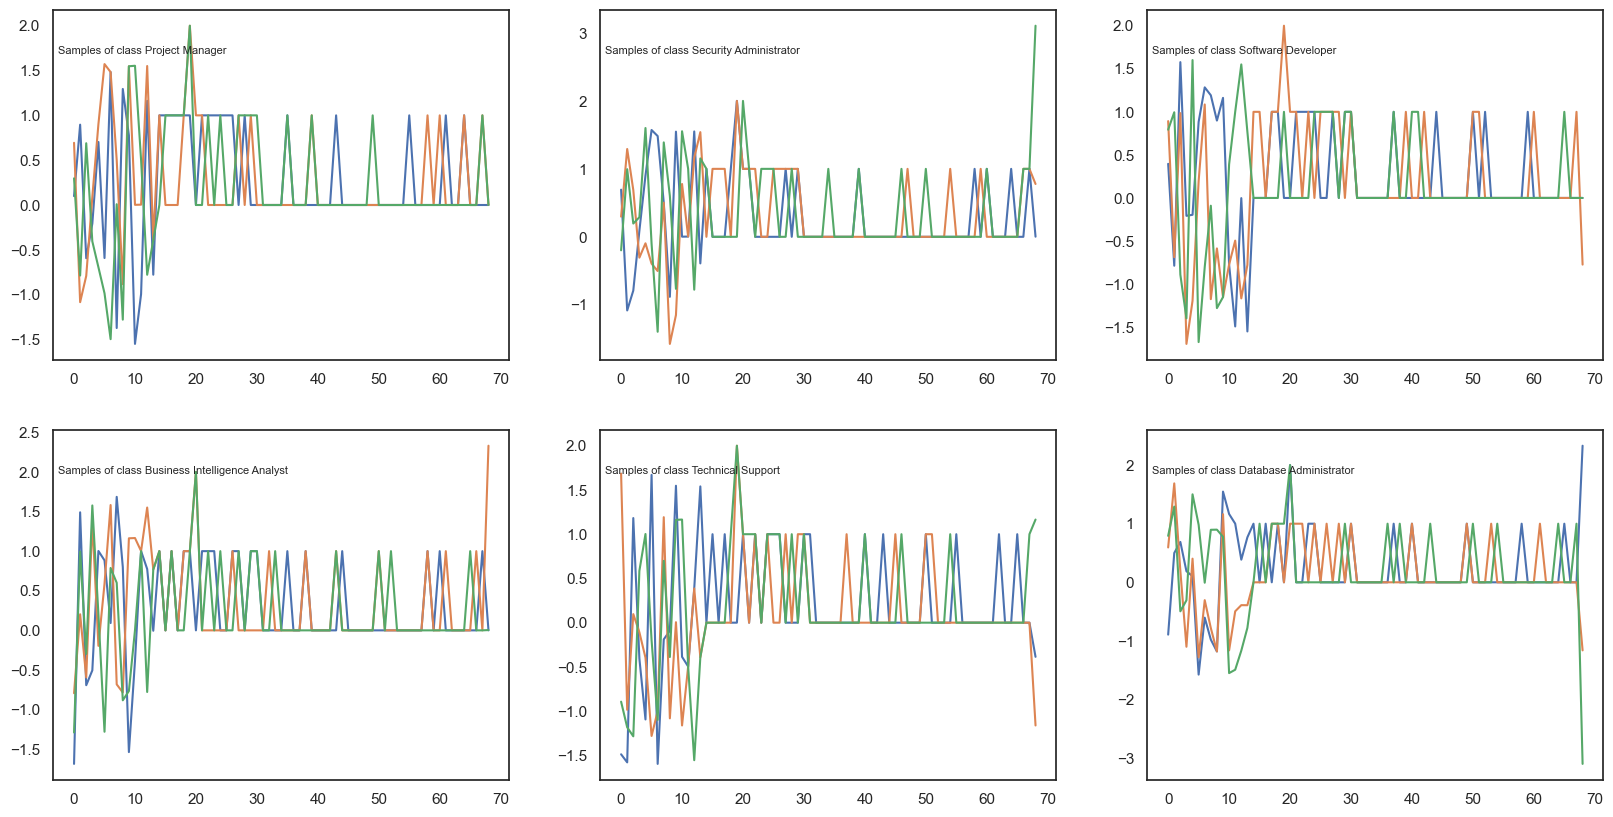

In [307]:
for i in range(0,6):
    plt.subplot(2,3,i + 1)
    all_samples_indexes = np.where(Y == i)[0]
    rand_samples_indexes = np.random.randint(0, len(all_samples_indexes), 3)
    rand_samples = X[rand_samples_indexes]
    plt.plot(rand_samples.transpose())
    plt.title("Samples of class " + classes[i], loc='left', fontdict={'fontsize':8}, x=0.01, y=0.85)

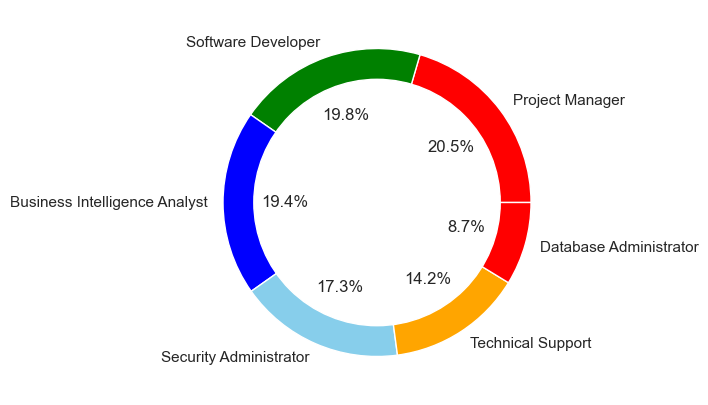

In [308]:
repartition = [4099,3968,3889,3468,2832,1744]

plt.figure(figsize=(5, 5))
circle = plt.Circle((0, 0), 0.8, color='white')
plt.pie(repartition, labels=['Project Manager', 'Software Developer', 'Business Intelligence Analyst', 'Security Administrator', 'Technical Support','Database Administrator'], colors=['red', 'green', 'blue', 'skyblue', 'orange'],
        autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [309]:
###########

In [ ]:
test_size = 6000

# pred_ = np.argmax(y_pred,axis=1)

pred_ = l_encode.inverse_transform(y_pred)

# true_y = np.argmax(y_test,axis=1)
# true_y = l_encode.inverse_transform(y_test)
true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test[:test_size]), axis = 1))

count = 0
for i,j in zip(pred_, true_y):
    #print("Predicted: {}, True: {}".format(i, j))
    if i==j:
        print(j)
        count +=1
print(count)